In [ ]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import os

# mount drive- following tutorial at https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674
from google.colab import drive
drive.mount('/content/drive')
 

Mounted at /content/drive


In [ ]:

im_dir='drive/My Drive/CHEME 599/Project/images'; # image path to open

fname='PL01.tif'
im=plt.imread(os.path.join(im_dir, fname)); # read image 
  
from skimage import color
im=color.rgb2gray(im) 
print(im.shape)

(506, 496)


In [ ]:
def unsharp_mask(im, scale):  
    from skimage.morphology import square
    from skimage.filters import rank
    from skimage.util import img_as_ubyte

    im=img_as_ubyte(im) # ensure the image is in uint8 form
    length=int((np.round(im.shape[1]/scale,0))); # set filter size to 1/ scaling factor of image size 
    selem=square(length) # create mask that is half as wide as the image rounded up
    background=1.0*rank.mean(im, selem) # generate the background image
    im_us=im-background # subtract background from main image
  # normalize the image fluoresence
    im_min=np.min(im_us)
    im_range = np.max(im_us)-im_min
    im_us = np.round(255*(im_us - im_min)/im_range, 0) # normalize
    return(im_us)

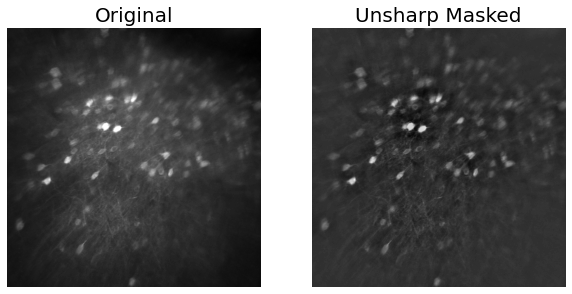

In [ ]:
from skimage.exposure import equalize_hist

im_us=unsharp_mask(im,10)

fig, ax = plt.subplots(ncols=2, figsize=(10,6)) 
titles=('Original', 'Unsharp Masked')
for axi, title in zip(ax,titles):
  axi.axis('off')
  axi.set_title(title, fontsize=20)

ax[0].imshow(im, cmap='gray')
ax[1].imshow(im_us, cmap='gray');

(-0.5, 495.5, 505.5, -0.5)

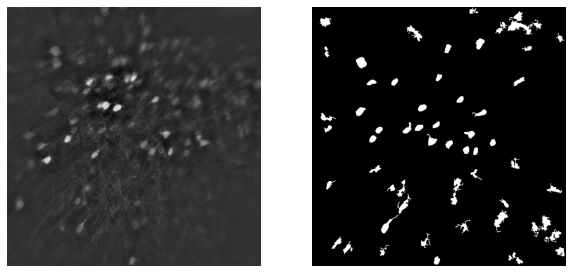

In [ ]:
from skimage.feature import canny # smooths image before calculating edges, can remove false edges
from skimage.morphology import disk, binary_dilation, binary_erosion
from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_objects

edges=canny(im_us)
edges= binary_fill_holes(edges)
edges=remove_small_objects(edges,100) # im, num pixels to threshold at

fig, axes=plt.subplots(ncols=2, figsize=(10,6))
axes[0].imshow(im_us, cmap='gray')
axes[1].imshow(edges,cmap='gray') # pick up a lot of edges within the coins 
axes[0].axis('off')
axes[1].axis('off')

(-0.5, 495.5, 505.5, -0.5)

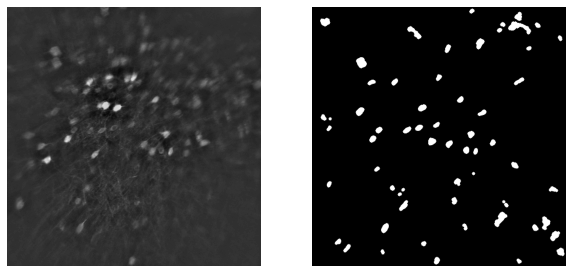

In [ ]:
from skimage.morphology import binary_opening

edges=binary_opening(edges,disk(3))
fig, axes=plt.subplots(ncols=2, figsize=(10,6))
axes[0].imshow(im_us, cmap='gray')
axes[1].imshow(edges,cmap='gray') # pick up a lot of edges within the coins 
axes[0].axis('off')
axes[1].axis('off')

(-0.5, 495.5, 505.5, -0.5)

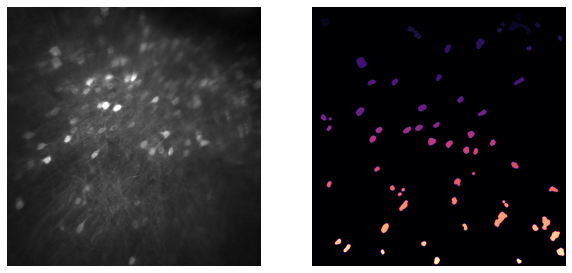

In [ ]:
from scipy.ndimage import label
from skimage.color import label2rgb

labeled, _ = label(edges)

fig, axes=plt.subplots(ncols=2, figsize=(10,6))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(labeled,cmap='magma') 
axes[0].axis('off')
axes[1].axis('off')
